In [1]:
### Load libraries ###

# interactive plotting
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor

from sklearn import set_config
set_config(display='diagram')

# MLTOOLS - Custom library
from mltools import regression_tools as RT
from mltools import forecast_tools as FT
from mltools import model_tools as MT
from neuralsens import partial_derivatives as ns


# Statsmodels time series 
#from statsmodels.tsa import SARIMAX
import statsmodels.api as sm

# Datetime for managing dates
from datetime import datetime

torch installation could not be found, only numpy activation functions allowed


## 1. Preparing the data

In [6]:
# Import data
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')

df = pd.read_csv('UnemploymentSpain.dat', sep="\t")#, parse_dates=['fecha'], date_parser=dateparse, index_col='fecha')
df.head()

,DATE,TOTAL
0,01/01/2001,2017389
1,01/02/2001,1993273
2,01/03/2001,1981006
3,01/04/2001,1910453
4,01/05/2001,1898285


In [7]:
#Info and type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    262 non-null    object
 1   TOTAL   262 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [8]:
# Data types
df.describe()

,TOTAL
count,2.620000e+02
mean,3.245651e+06
std,9.876495e+05
min,1.835738e+06
25%,2.122571e+06
50%,3.308420e+06
75%,4.084418e+06
max,5.040222e+06


IndexError: list index out of range

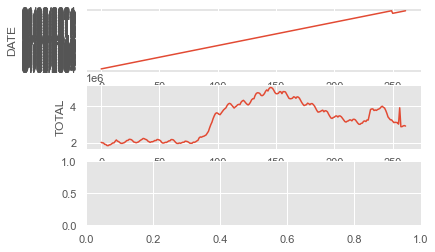

In [9]:
# Plotting a time series
fig, axes = plt.subplots(3, 1)
count = 0
for ax in axes.ravel():
    ax.plot(df.columns.values.tolist()[count], data=df)
    ax.set_ylabel(df.columns.values.tolist()[count])
    count += 1
plt.show()